In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [6]:
from sklearn.datasets import make_blobs

In [8]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [9]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [5]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)
# centoriod 
# try to find each blob’s center and assign each instance to the closest blob

In [4]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    

In [7]:
y_pred

array([0, 4, 1, ..., 2, 1, 4])

In [8]:
y_pred is kmeans.labels_

True

In [9]:
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

In [10]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

In [11]:
kmeans.transform(X_new)
    #  1st centroid, 2nd centroid, 3,       4,          5

array([[2.88633901, 0.32995317, 2.9042344 , 1.49439034, 2.81093633],
       [5.84236351, 2.80290755, 5.84739223, 4.4759332 , 5.80730058],
       [1.71086031, 3.29399768, 0.29040966, 1.69136631, 1.21475352],
       [1.21567622, 3.21806371, 0.36159148, 1.54808703, 0.72581411]])

In [12]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)
# this way can't get the kmeans.inertia_, because there us no random initialization

In [13]:
kmeans.fit(X)
kmeans.inertia_
# first run fit method, then we can call inertia_

211.62337889822362

In [14]:
kmeans.score(X)
# n_init default is 10, run 10 times when we call fit

-211.6233788982236

In [15]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

In [16]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)
# kmeans cluster is 5 here

0.655517642572828

Saving figure silhouette_analysis_plot


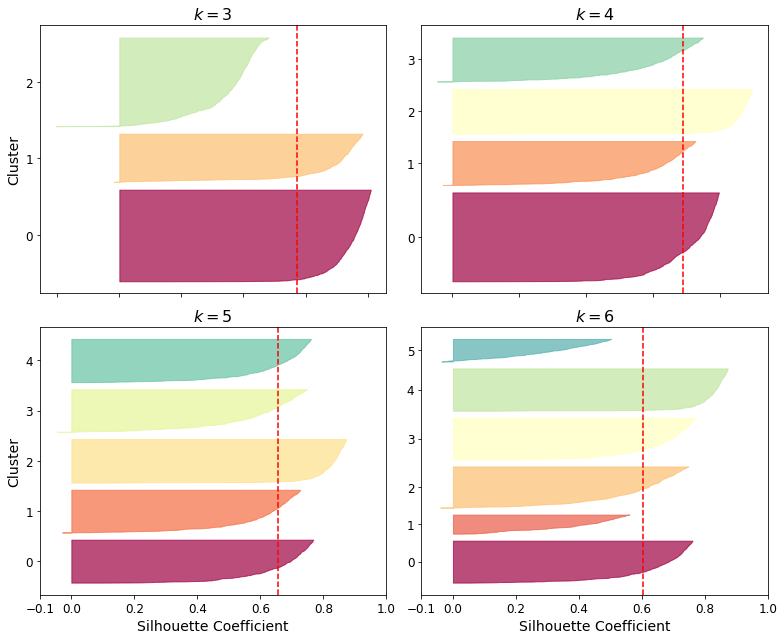

In [17]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("silhouette_analysis_plot")
plt.show()

In [18]:
from matplotlib.image import imread # or `from imageio import imread`
# using cluster for image segmentation

In [19]:
# Download the ladybug image
import urllib.request
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\unsupervised_learning\\ladybug.png',
 <http.client.HTTPMessage at 0x24297611580>)

In [20]:
image = imread(os.path.join("images","unsupervised_learning","ladybug.png"))

In [21]:
image.shape
# 3 channel
# 533, height
# 800, width

(533, 800, 3)

In [22]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
# for each color, it looks for the mean color of the pixel’s color cluster
segmented_img = segmented_img.reshape(image.shape)

In [23]:
X

array([[0.09803922, 0.11372549, 0.00784314],
       [0.09411765, 0.10980392, 0.00392157],
       [0.09411765, 0.11372549, 0.        ],
       ...,
       [0.03921569, 0.22745098, 0.        ],
       [0.01960784, 0.20392157, 0.        ],
       [0.00784314, 0.1882353 , 0.        ]], dtype=float32)

In [24]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)
# a little mnist datasets

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [26]:
print(len(X_train))
print(len(X_test))

1347
450


In [27]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [28]:
log_reg_score = log_reg.score(X_test, y_test)
log_reg_score

0.9644444444444444

In [29]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [30]:
pipeline.score(X_test, y_test)

0.9755555555555555

In [39]:
#the best value of k is
#simply the one that results in the best classification performance during crossvalidation
from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans__n_clusters=range(2, 100))
# find the best cluster number
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)


Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.3s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.3s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed: 20.1min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [40]:
grid_clf.best_params_

{'kmeans__n_clusters': 95}

In [41]:
grid_clf.score(X_test, y_test)

0.9822222222222222

In [35]:
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
# first 50 labeled
# semi-supervised

LogisticRegression(multi_class='ovr', random_state=42)

In [36]:
log_reg.score(X_test, y_test)

0.8311111111111111

In [37]:
# now that's train the full training set
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
# find the image closest to the centroid
X_representative_digits = X_train[representative_digit_idx]

Saving figure representative_images_diagram


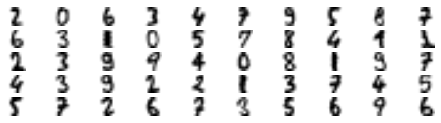

In [39]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

save_fig("representative_images_diagram", tight_layout=False)
plt.show()
# the 50 representitive image

In [40]:
y_representative_digits = np.array([2,0,6,3,4,7,9,5,8,7,6,3,1,0,5,7,8,4,9,1,2,3,9,9,4,0,8,1,9,7,4,3,9,2,2,1,3,7,4,5,5,7,2,6,7,3,5,6,9,6])

In [41]:
len(y_representative_digits)
# the 50 label that we already know
# now we have a datasets just 50 labeled instances
# instead of being random instances, each of them is a representative image of its cluster.

50

In [42]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
# need bigger max_iter than default

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [43]:
log_reg.score(X_test, y_test)

0.8755555555555555

In [44]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
# labels means the number of the cluster


In [45]:
kmeans.labels_

array([16, 10, 20, ..., 42, 16, 44])

In [46]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)
# already use clustering

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [47]:
log_reg.score(X_test, y_test)

0.8822222222222222

In [48]:
percentile_closest = 20
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

In [49]:
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    # only the 20% closest of that cluster remain
    
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1
    # above_cutoff is -1
partially_propagated = (X_cluster_dist != -1) # a true or false array
# those aren't -1 is what we looking for
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]
# y_train_propagated is what we assinged before, same label for the instances inside the same representative

In [50]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [51]:
log_reg.score(X_test, y_test)

0.8933333333333333

In [52]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])
# how many propagated labels are accurate

0.9655172413793104

In [53]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05)

In [54]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
# min_samples for core
dbscan.fit(X)

DBSCAN(eps=0.05)

In [55]:
dbscan.labels_
# –1, which means that
# they are considered as anomalies by the algorithm

array([ 0,  1,  2,  2,  3, -1,  9,  3, -1,  1,  4,  0,  5,  4,  6,  2,  3,
       -1, 10, 11,  5,  7,  2,  3,  0,  4,  3, -1,  8,  5,  2,  7,  0,  5,
        9,  1,  2,  3,  2,  3,  3,  9,  3,  3,  5,  2,  2, -1,  8,  2,  2,
        0,  0,  2,  1,  3,  6,  0,  1,  3,  4,  4,  2, -1,  6,  1,  3,  8,
        1,  3,  3,  5,  9, -1,  5,  2,  7,  3, 10,  3,  7, -1,  9,  2,  3,
        1, 10,  4,  1,  3,  5,  1,  4,  4,  5,  3,  0,  0,  2,  1,  8,  8,
        1,  3,  3,  3,  1,  3,  8,  4,  0,  4,  5,  5,  2,  0,  2,  4,  0,
        4, -1,  5,  0,  4,  2,  8,  4,  1,  0,  3, -1,  5,  4,  3,  1, 10,
        5,  0,  5,  3,  1,  8, 11,  8,  2,  4,  3, 10, -1, -1,  3,  6,  4,
        5,  3,  4,  3,  3,  5,  8,  3,  2,  8,  2,  3,  5,  6, 10,  8, 10,
       -1,  2,  3,  0,  4, -1,  4, -1,  2,  0,  4,  8,  2,  2,  2,  2,  2,
        8,  5,  0,  2,  2,  2,  8,  8,  2,  6,  3,  3,  5,  9, 10,  5, -1,
        8,  3,  7, 10,  0,  3,  2,  2,  0,  3,  3, 10, -1,  2,  9,  7,  8,
        8,  2,  7,  0,  3

In [56]:
len(dbscan.core_sample_indices_)

787

In [57]:
dbscan.core_sample_indices_
# the indices of core instances

array([  0,   1,   2,   3,   4,  10,  11,  12,  13,  14,  15,  16,  20,
        21,  22,  23,  24,  25,  26,  28,  29,  30,  31,  32,  33,  35,
        36,  37,  39,  40,  42,  43,  44,  45,  46,  48,  49,  50,  51,
        52,  53,  54,  56,  57,  58,  59,  60,  61,  62,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  74,  75,  76,  77,  79,  80,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  94,  95,  96,  98,
       100, 101, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 131, 132, 133, 135, 136, 137, 138, 140, 141, 143, 144, 146,
       147, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
       163, 165, 167, 168, 169, 171, 172, 173, 174, 176, 178, 179, 180,
       181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
       195, 196, 198, 199, 200, 201, 202, 204, 205, 206, 208, 210, 212,
       213, 214, 218, 219, 220, 221, 222, 223, 225, 226, 227, 22

In [58]:
dbscan.components_

array([[ 1.48795866, -0.41498922],
       [ 0.91151573,  0.37089166],
       [ 0.89355707, -0.45206492],
       ...,
       [ 0.93342936, -0.52648867],
       [ 0.94932476,  0.33013726],
       [-0.23258731,  1.0134398 ]])

In [59]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)


DBSCAN(eps=0.2)

In [60]:
dbscan = dbscan2
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
# only fit 50 core instances
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])
 
# components are core instances themselves
# two features in this case


KNeighborsClassifier(n_neighbors=50)

In [61]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)
# two features

array([1, 0, 1, 0], dtype=int64)

In [62]:
knn.predict_proba(X_new)

array([[0.16, 0.84],
       [1.  , 0.  ],
       [0.16, 0.84],
       [1.  , 0.  ]])

In [63]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
# in the label, select all the core, then the k nearest neighbor
y_pred[y_dist > 0.2] = -1
y_pred.ravel()


array([-1,  0,  1, -1], dtype=int64)

In [64]:
y_pred_idx

array([[870],
       [795],
       [980],
       [580]], dtype=int64)

In [65]:
dbscan.labels_[dbscan.core_sample_indices_]
# turn label array into array that make us know which is core

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,

In [66]:
dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]

array([[1],
       [0],
       [1],
       [0]], dtype=int64)

In [67]:
y_dist

array([[0.39326572],
       [0.01361707],
       [0.0578468 ],
       [0.46186655]])

In [10]:
# Gaussian Mixtures
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [11]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)
# we gave the correct number of clusters, 3

GaussianMixture(n_components=3, n_init=10)

In [12]:
gm.weights_
# used to generate data

array([0.39054348, 0.2093669 , 0.40008962])

In [13]:
gm.means_

array([[ 0.05224874,  0.07631976],
       [ 3.40196611,  1.05838748],
       [-1.40754214,  1.42716873]])

In [14]:
gm.covariances_

array([[[ 0.6890309 ,  0.79717058],
        [ 0.79717058,  1.21367348]],

       [[ 1.14296668, -0.03114176],
        [-0.03114176,  0.9545003 ]],

       [[ 0.63496849,  0.7298512 ],
        [ 0.7298512 ,  1.16112807]]])

In [15]:
gm.converged_
# whether it converge

True

In [16]:
gm.n_iter_

4

In [17]:
gm.predict(X)
# hard clustering

array([0, 0, 2, ..., 1, 1, 1], dtype=int64)

In [18]:
gm.predict_proba(X)
# soft clustering

array([[9.77227791e-01, 2.27715290e-02, 6.79898914e-07],
       [9.83288385e-01, 1.60345103e-02, 6.77104389e-04],
       [7.51824662e-05, 1.90251273e-06, 9.99922915e-01],
       ...,
       [4.35053542e-07, 9.99999565e-01, 2.17938894e-26],
       [5.27837047e-16, 1.00000000e+00, 1.50679490e-41],
       [2.32355608e-15, 1.00000000e+00, 8.21915701e-41]])

In [23]:
X_new, y_new = gm.sample(6)
X_new, y_new

(array([[ 0.12663234,  0.40148813],
        [ 0.74850579,  1.66213078],
        [-3.81531863, -1.27419701],
        [-1.82239952,  1.37291952],
        [-0.20411681,  2.177233  ],
        [-1.8290146 ,  0.49993873]]),
 array([0, 0, 2, 2, 2, 2]))

In [24]:
gm.score_samples(X)
# compute the exponential of these scores, you get the value of the PDF
# at the location of the given instances

array([-2.60674489, -3.57074133, -3.33007348, ..., -3.51379355,
       -4.39643283, -3.8055665 ])

In [25]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]


In [26]:
gm.bic(X)

8189.662685850679

In [27]:
gm.aic(X)

8102.437405735641

In [28]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=10)

In [29]:
np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.  , 0.39, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])